# 1. Introduction

Nikki Satmaka - Batch 11

## Description

Dataset is taken from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

Context:

This dataset contains

1. `customerID` : A unique ID that identifies each customer.
1. `gender` : The customer’s gender: Male, Female
1. `SeniorCitizen` : Indicates if the customer is 65 or older: 1 = Senior Citizen, 0 = Not Senior Citizen
1. `Partner` : Indicates if the customer is married: Yes, No
1. `Dependents` : Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
1. `tenure` :  Indicates the total amount of months that the customer has been with the company.
1. `PhoneService` : Indicates if the customer subscribes to home phone service with the company: Yes, No
1. `MultipleLines` : Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service
1. `InternetService` : Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic
1. `OnlineSecurity` : Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service
1. `OnlineBackup` : Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service
1. `DeviceProtection` : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service
1. `TechSupport` : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service
1. `StreamingTV` : Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No internet service
1. `StreamingMovies` : Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No internet service
1. `Contract` : Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
1. `PaperlessBilling` : Indicates if the customer has chosen paperless billing: Yes, No
1. `PaymentMethod` : Indicates how the customer pays their bill: Bank Transfer, Credit Card, Electronic Check, Mailed Check
1. `MonthlyCharges` : Indicates the customer’s current total monthly charge for all their services from the company.
1. `TotalCharges` : Indicates the customer’s total charges.
1. `Churn` : Yes = the customer left the company. No = the customer remained with the company.

### Objective

- pass

### Problem Statement

- pass

# 2. Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pathlib import Path

# Useful functions
from packages.checker import check_missing, check_missing_special
from packages.outlier_handling import check_outlier, outlier_summary
from packages.outlier_handling import trim_cap_outliers
from packages.imputation_handling import prepare_imputation

from pandas_profiling import ProfileReport

import joblib

import warnings
warnings.filterwarnings('ignore')

# For Handling outlier
from feature_engine.outliers import OutlierTrimmer
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import ArbitraryOutlierCapper

# For Handling Missing Values
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import ArbitraryNumberImputer

# For Data Preprocessing
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# Neural Network
import tensorflow as tf
from tensorflow import keras

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluate Classification Models
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import auc


pd.set_option('display.precision', 2)

sns.set_theme(style='darkgrid', palette='Set1')

# set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline

## Useful Functions

In [2]:
def kdeplot(data, x, hue):
    """
    Plot KDE of data grouped by hue
    """
    plt.figure(figsize=(15, 5))
    ax = sns.kdeplot(data=data, x=x, hue=hue, shade=True)
    plt.title(f'Distribution of {x} grouped by {hue}')
    plt.xlabel(x)
    plt.ylabel(None)
    plt.yticks([])

    plt.show()

# 3. Data Loading

In [3]:
# load dataset
df_ori = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df_ori.copy()

# display the first 5 entries of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# display the last 5 entries of the data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Data Understanding

In [5]:
# check dataset shape
df.shape

(7043, 21)

There are 7043 instances and 21 columns of data

In [6]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This is weird. Why would `TotalCharges` have `object` as a dtype? It should be similar to `MonthlyCharges` which is `float64`\
Let's see the unique values

In [7]:
# check unique values for `TotalCharges` feature
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


Glancing at the unique values, it's clear that they're numbers, but quoted as string.\
Let's convert `TotalCharges` to `float64` and pass any errors as `NaN`

In [8]:
# convert `TotalCharges` to numeric and pass any non-numeric values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Let's check the info again

In [9]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# check missing values in dataset
check_missing(df)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,11,0.16


Seems like those 11 missing values were the cause of that `object` data type\
We've got 0.16% missing values in `TotalCharges`

## Basic Characteristics of the Dataset

In [11]:
# check basic stats for numerical features
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,29.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,70.35,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,1397.47,8684.80


In [12]:
# check basic stats for features with object dtypes
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
# check the cardinality of each nominal and ordinal features
print("Nominal and ordinal features cardinality:")
for col in df.columns:
    if df[col].nunique() < 20:
        print(col, ':', df[col].nunique(), 'unique values \n', np.sort(df[col].unique()))
        print('-' * 100)

Nominal and ordinal features cardinality:
gender : 2 unique values 
 ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen : 2 unique values 
 [0 1]
----------------------------------------------------------------------------------------------------
Partner : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Dependents : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines : 3 unique values 
 ['No' 'No phone service' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService : 3 unique values 
 ['DSL' 'Fiber optic' 'No']
-------

Let's cover some basic stats of the features in the train set.
- `customerID`
    - Index
    - I'm going to drop this feature early on because it functions as an index and do not have any use as a predictor
- `gender`
    - Nominal feature
    - Most customers are Male
    - Two unique values
- `SeniorCitizen`
    - Nominal feature
    - Two unique values
    - Since it's either 0 or 1 and the median of the data is 0, the mode is also 0
    - Most customers are not senior citizens
- `Partner`
    - Nominal feature
    - Two unique values
    - Most customers do not have a partner
- `Dependents`
    - Nominal feature
    - Two unique values
    - Most customers do not have any dependents
- `tenure`
    - Numerical feature
    - Ranges from 0 to 72
    - Mean is higher than the median
    - Might be right skewed
- `PhoneService`
    - Nominal feature
    - Two unique values
    - Most customers have a phone service
- `MultipleLines`
    - Nominal feature
    - Three unique values
    - Most customers have do not have multiple lines
- `InternetService`
    - Nominal feature
    - Three unique values
    - Most customers have fiber optic internet service
- `OnlineSecurity`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional online security service
- `OnlineBackup`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional online backup service
- `DeviceProtection`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional device protection service
- `TechSupport`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional tech support service
- `StreamingTV`
    - Nominal feature
    - Three unique values
    - Most customers have do not have tv streaming service
- `StreamingMovies`
    - Nominal feature
    - Three unique values
    - Most customers have do not have movie streaming service
- `Contract`
    - Nominal feature
    - Three unique values
    - Most customers are on a month-to-month contract
- `PaperlessBilling`
    - Nominal feature
    - Two unique values
    - Most customers chose paperless billing
- `PaymentMethod`
    - Nominal feature
    - Four unique values
    - Most customers pay using electronic check
- `MonthlyCharges`
    - Numerical feature
    - Ranges from 18.25 to 118.75 per month
    - Mean is lower than the median
    - Might be left skewed
- `TotalCharges`
    - Numerical feature
    - Ranges from 18.80 to 8684.80
    - Mean is significantly higher than the median
    - Might be right skewed
- `Churn`
    - Target label

## Data Preparation

Drop `customerID` because it's an index

In [14]:
# drop `customerID` from the dataset
df = df.drop(['customerID'], axis=1)

## Check for Dataset Imbalance

Check whether the target variable of the dataset is balance

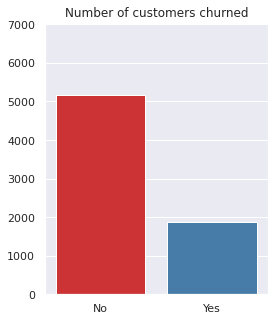

In [15]:
# check for imbalance in target variable
plt.figure(figsize=(4,5))
sns.countplot(data=df, x='Churn')
plt.title('Number of customers churned')
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, df.shape[0])

plt.show()

We can see that most clients are not churned and the percentage of churned clients is less than 30% of the dataset.\
That means our dataset is imbalance and we need to stratify when splitting

## Splitting Dataset

We need to split the dataset into inference, train and test sets before we do any EDA.\
We do our EDA on the train set so as to not have any bias towards the whole dataset.

### Sample data for inference

In [16]:
# sample dataset for inference
df_inf = df.sample(10, random_state=42)

# remove inference set from original dataset
df_train_test = df.drop(df_inf.index).reset_index(drop=True)

# reset index for inference set
df_inf = df_inf.reset_index(drop=True)

print('df_inf Size:', df_inf.shape)

df_inf Size: (10, 20)


### Split train and test set


Since the target variable is imbalanced, we use stratified sampling

In [17]:
# we use stratified sampling to ensure that the distribution of the target variable is balanced
df_train, df_test = train_test_split(
    df_train_test,
    test_size=0.20,
    random_state=42,
    stratify=df_train_test['Churn']
)

print('df_train Size:', df_train.shape)
print('df_test Size:', df_test.shape)

df_train Size: (5626, 20)
df_test Size: (1407, 20)


In [18]:
# backup the train set that we are gonna perform EDA on
df_train_ori = df_train.copy()

# 4. Exploratory Data Analysis

I'm going to create a dummy variable for the target label to make the EDA easier.
So that I can call thu numeric dummy of the target, with `0 being Not Churned and 1 being Churned`

In [19]:
# create a dummy feature for 'Churn'
df_train = pd.concat([df_train, pd.get_dummies(df_train['Churn'], prefix='Churn', drop_first=True)], axis=1)

## Basic Customer Information

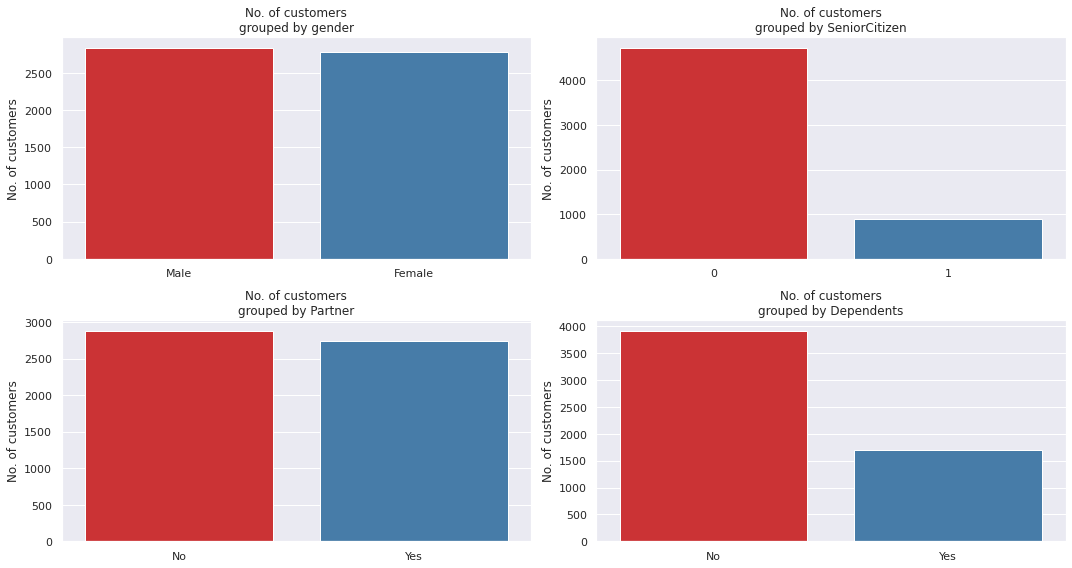

In [20]:
# plot number of customers grouped by basic information
plt.figure(figsize=(15, 8))
for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    sns.countplot(
        data=df_train,
        x=col, order=df_train[col].value_counts().index, ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'No. of customers\ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("No. of customers")


plt.tight_layout()
plt.show()

There's about the same number of male and female customers.\
There are more Non-Senior citizens than Seniors\
The number of customers who have a partner and those who don't are about equal\
Most customers do not have any dependents

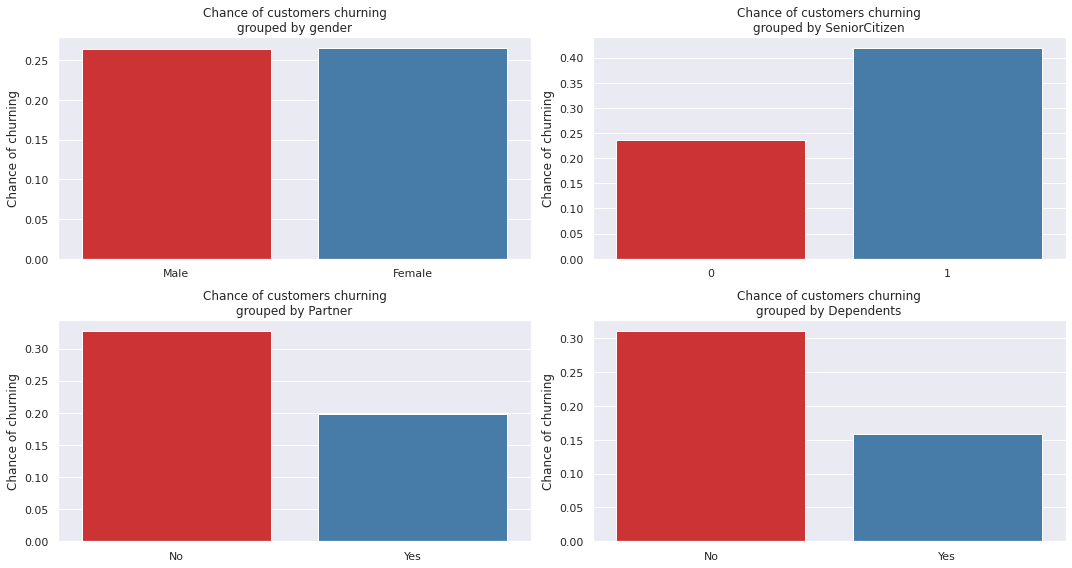

In [21]:
# plot chance of customers churning grouped by basic information
plt.figure(figsize=(15, 8))
for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    sns.barplot(
        data=df_train,
        x=col, y='Churn_Yes',
        order=df_train[col].value_counts().index,
        ci=None,
        ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'Chance of customers churning\ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

It seems like both male and female have about equal chance of stopping the subscription\
Though there are only a few Senior-citizen customers, they have a higher chance of stopping their subscriptions, about 40% of them

## Base Services

In [22]:
np.sort(df_train['PhoneService'].value_counts().index)

array(['No', 'Yes'], dtype=object)

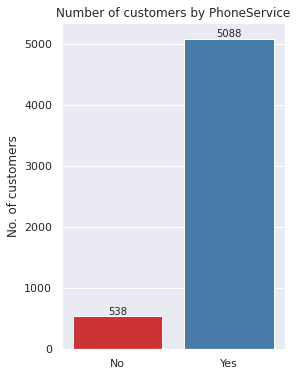

In [23]:
# plot number of customers by PhoneService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train, x='PhoneService', order=np.sort(df_train['PhoneService'].value_counts().index))
plt.title(f'Number of customers by PhoneService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Most of our customers subscribe to a Phone Service. For those few that do not, they should be subscribing to an Internet Service, otherwise they wouldn't be a customer at all

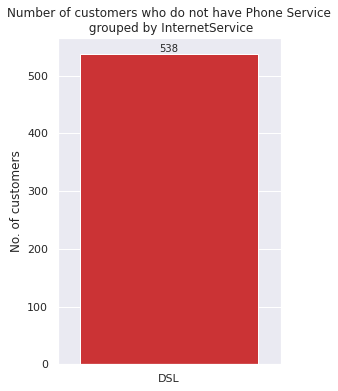

In [24]:
# plot number of customers who do not have PhoneService grouped by InternetService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train[df_train['PhoneService'] == 'No'], x='InternetService')
plt.title(f'Number of customers who do not have Phone Service\n grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

They all subscribe to the DSL Internet Service

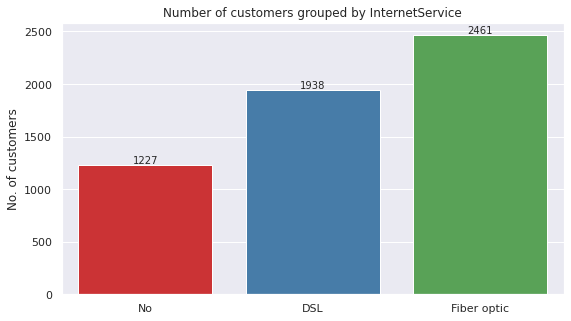

In [25]:
# plot number of customers by InternetService
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df_train, x='InternetService')
plt.title(f'Number of customers grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Seems like most of the customers subscribe to Fiber optic.

I want to see how many customers subscribe to both phone service and internet service

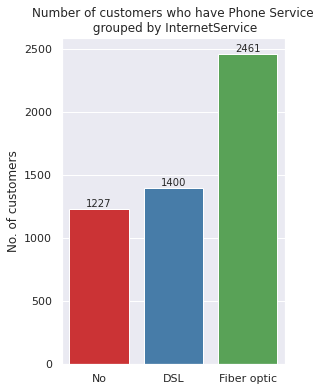

In [26]:
# plot number of customers who have PhoneService grouped by InternetService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train[df_train['PhoneService'] == 'Yes'], x='InternetService')
plt.title(f'Number of customers who have Phone Service\n grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Seems like they mostly subscribe to Fiber optic. Since the price of fiber optic is more expensive than the DSL, and they also subscribe to a phone service, their monthly charges must be high

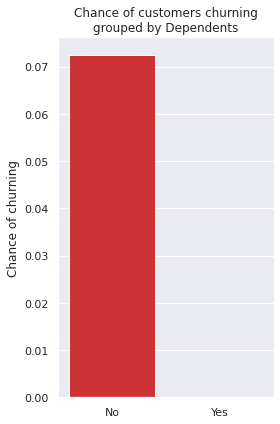

In [27]:
# plot chance of customers churning grouped by basic information
plt.figure(figsize=(4, 6))
sns.barplot(
    data=df_train,
    x='InternetService', y='Churn_Yes',
    order=df_train[col].value_counts().index,
    ci=None
)
plt.title(f'Chance of customers churning\ngrouped by {col}')
plt.xlabel(None)
plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

Though they likely pay higher for their subscriptions and bring more revenues for the company, customers who use Fiber optic have about double the chance of churning compared to customers who use DSL

## Multiple Lines

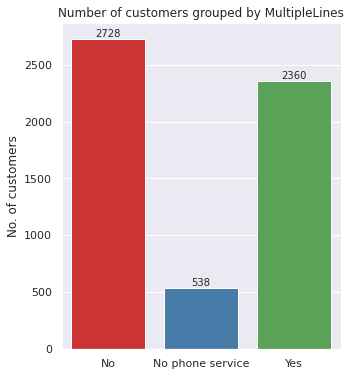

In [28]:
# plot number of customers grouped by MultipleLines
plt.figure(figsize=(5, 6))
ax = sns.countplot(data=df_train, x='MultipleLines')
plt.title(f'Number of customers grouped by MultipleLines')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Ignoring the customers who do not have a phone service, most customers do not have multiple lines, and instead only have a single phone line

I wonder if these customers who subscribe to multiple phone lines would also choose the more expensive, higher quality Fiber optic as their internet service.\
I think these must be customers who are well-off

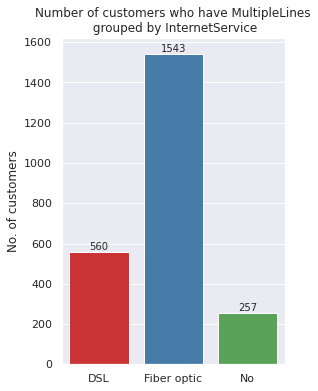

In [29]:
# plot number of customers who have MultipleLines grouped by InternetService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train[df_train['MultipleLines'] == 'Yes'], x='InternetService')
plt.title(f'Number of customers who have MultipleLines\n grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

It seems that my hunch was correct and these are well-off customers who want the best of the best

## Additional Services

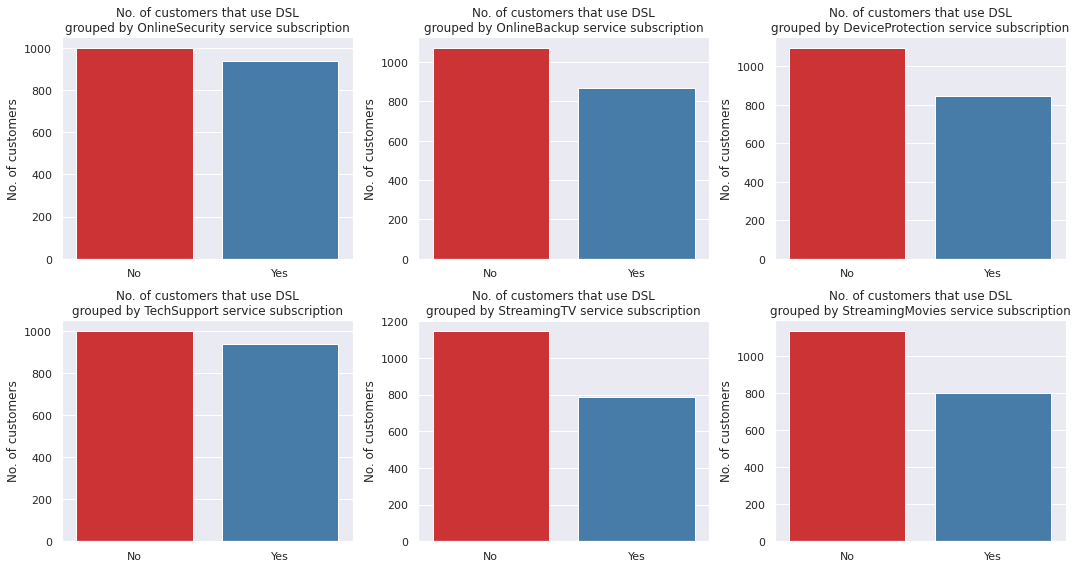

In [30]:
# plot number of customers that use DSL grouped by additional services subscription
plt.figure(figsize=(15, 8))
for i, col in enumerate(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]):
    sns.countplot(
        data=df_train[df_train['InternetService'] == 'DSL'],
        x=col, order=df_train[col].value_counts().index[:-1],
        ax=plt.subplot(2, 3, i+1)
    )
    plt.title(f'No. of customers that use DSL\ngrouped by {col} service subscription')
    plt.xlabel(None)
    plt.ylabel("No. of customers")

plt.tight_layout()
plt.show()

Seems like most people who use DSL do not subscribe to additional services.\
However, we do have to note that the number of customers who subscribe to online security and tech support are also about equal to those who don't

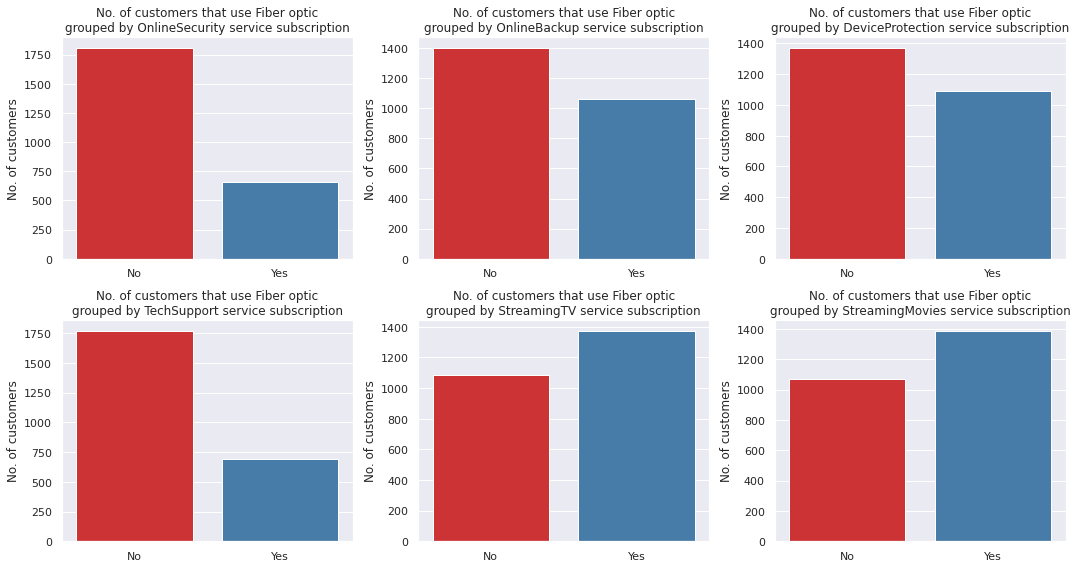

In [31]:
# plot number of customers that use Fiber optic grouped by additional services subscription
plt.figure(figsize=(15, 8))
for i, col in enumerate(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]):
    sns.countplot(
        data=df_train[df_train['InternetService'] == 'Fiber optic'],
        x=col, order=df_train[col].value_counts().index[:-1],
        ax=plt.subplot(2, 3, i+1)
    )
    plt.title(f'No. of customers that use Fiber optic\ngrouped by {col} service subscription')
    plt.xlabel(None)
    plt.ylabel("No. of customers")

plt.tight_layout()
plt.show()

Contrary to the DSL users, most Fiber optic users do not subscribe to online security and tech support. Is this because Fiber optic is less prone to cyber attacks, so they opted out of those additional services?\
We can also see that these customers tend to subscribe to third-party streaming TV and streaming Movies services. This might be because they have faster, more reliable internet connection and they're also more well-off. So they want better entertainment

## Payment Method

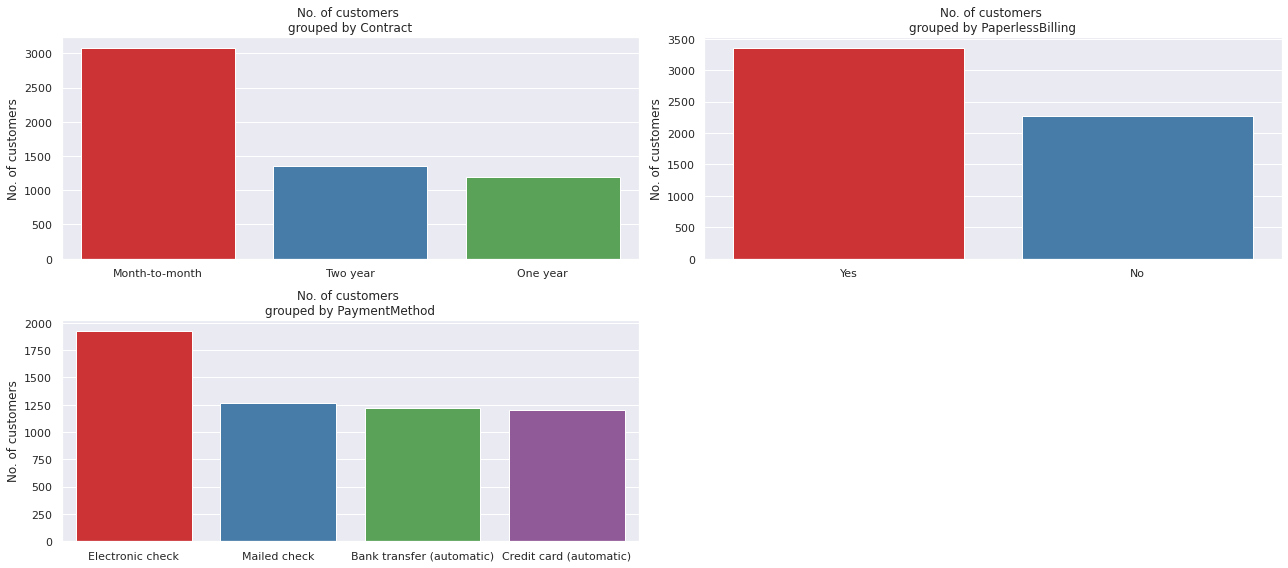

In [32]:
# plot number of customers grouped by additional services subscription
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod']):
    sns.countplot(
        data=df_train,
        x=col, order=df_train[col].value_counts().index,
        ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'No. of customers \ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("No. of customers")

plt.tight_layout()
plt.show()

Most people are on a month-to-month contract. I don't think this is a good way to retain customers.\
Most people use paperless billing\
Most people use electronic check as their payment method. I think that automatic payment by bank transfer and credit card would be better for customer retention

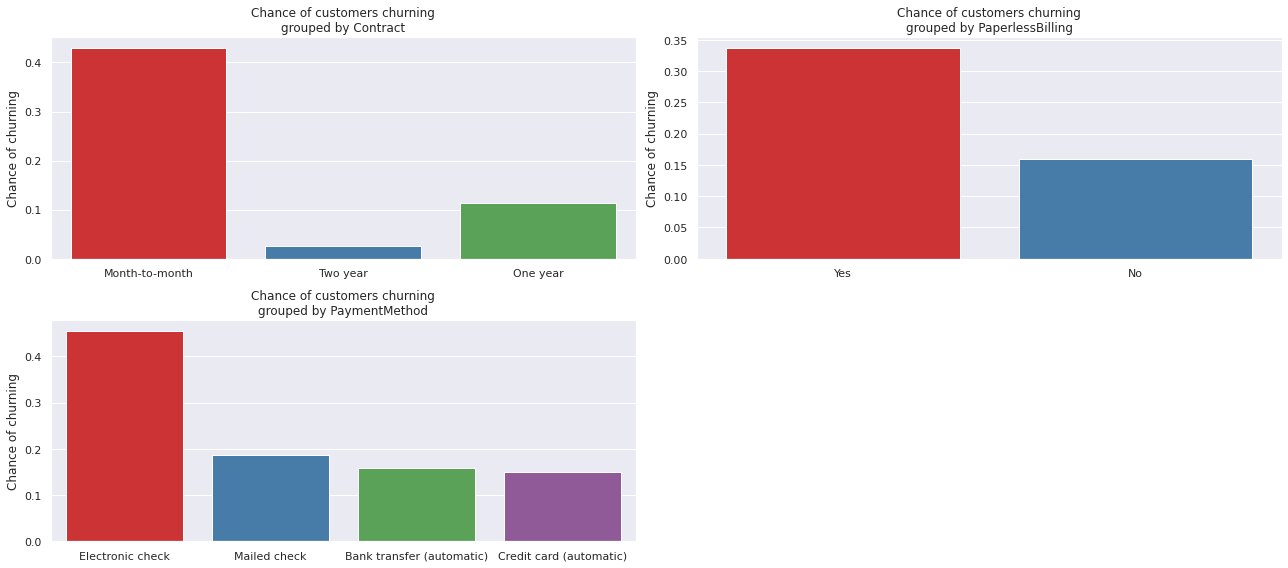

In [33]:
# plot chance of customers churning grouped by basic information
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod']):
    sns.barplot(
        data=df_train,
        x=col, y='Churn_Yes',
        order=df_train[col].value_counts().index,
        ci=None,
        ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'Chance of customers churning\ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

It's pretty clear that month-to-month contract is bad for retention, while a two-year contract retain the customers best, with very low chance of churning.\
Customers who pay using electronic check have a higher tendency of stopping their subscription services. This makes sense, since they have to manually pay every month, they might feel more pain when paying and might stop subscribing to cut down their expenses.\
Though I'm quite surprised that customers who pay using mailed check have quite a similar retention to those with automatic payment method

## Tenure, Monthly Charges, and Total Charges

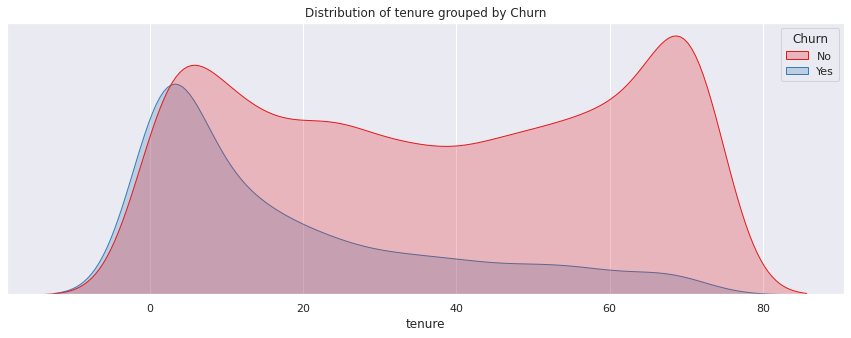

In [34]:
kdeplot(df_train, 'tenure', 'Churn')

We can see that most customers who stopped their subscription, did so on their early months of subscribing.\
It seems that once we get past the one-year mark, which is around 12 months, a customer is most likely to keep their subscription

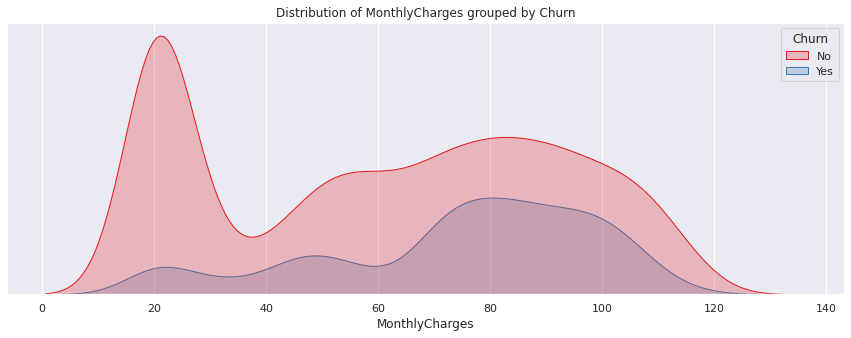

In [35]:
kdeplot(df_train, 'MonthlyCharges', 'Churn')

Seems like most customers are charged around $80 per month\
Most customers who are charged around $20 tend to stay with the company more.\
These are definitely not customers who uses multiple lines and fiber optic.\
Maybe these are customers who only subscribes to a single line phone service

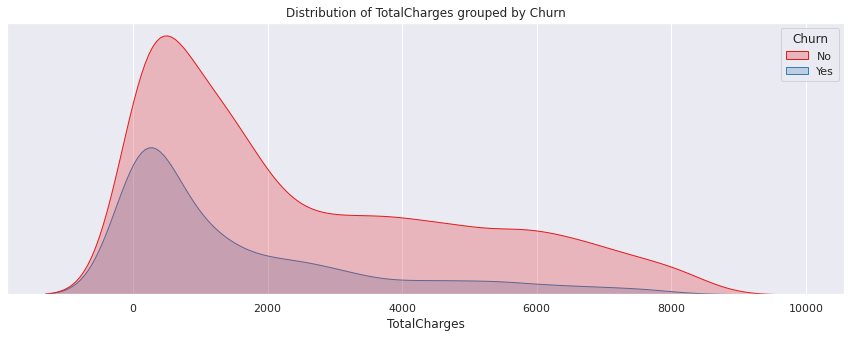

In [36]:
kdeplot(df_train, 'TotalCharges', 'Churn')

There does not seem to be any difference in the distribution of profiles between those customers who churned and those who did not

# 5. Data Preprocessing

In [37]:
# restore the train set from the backup
df_train = df_train_ori.copy()

In [38]:
# split between features and target
X_train = df_train.drop(['Churn'], axis=1)
y_train = df_train['Churn'].copy()

X_test = df_test.drop(['Churn'], axis=1)
y_test = df_test['Churn'].copy()

## Categorizing Features

Categorize the features based on the variable type of the features and the data it represents
- Numeric (Interval): Features which have equally spaced interval between unique values
- Categorical (Nominal): Features which have no intrinsic ordering to the unique values
- Ordinal: Features which have clear ordering but do not have equally spaced intervals between unique values

In [39]:
# categorizing features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

nom_cols = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

ord_cols = []

## Handling Outliers

In [40]:
# check outlier summary only on numerical features
outlier_summary(X_train[num_cols], 1.5)

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,tenure,0.24,normal,0,0.0
1,MonthlyCharges,-0.22,normal,0,0.0
2,TotalCharges,0.96,skewed,0,0.0


1. `Trimming`: if outliers' percentage < 5%
2. `Capping`: if outliers' percentage 5% - 15%
3. `None`: if outliers' percentage > 15%

We have no outliers for the numerical values in the dataset

## Handling Missing Values

In [41]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,8,0.14


We have 8 missing values in X_train in `TotalCharges` 

In [42]:
# check missing values in train target
y_train.isna().sum()

0

In [43]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,3,0.21


We have 3 missing values in X_test in `TotalCharges` 

In [44]:
# check missing values in test target
y_test.isna().sum()

0

Let's look further into the missing values

In [45]:
# display missing values in train set
X_train[X_train['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6660,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
4370,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1336,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
3816,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
5208,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
751,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
6744,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
3323,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN


It seems that all missing values have the `tenure 0`. Let's check if this premise is correct

In [46]:
# check if missing values instances are the same with `0` tenure instances
X_train[X_train['TotalCharges'].isna()].equals(X_train[X_train['tenure'] == 0])

True

So the premise is correct and all `0 tenure` does not have any `TotalCharges` values.\
It seems like these are instances for customers who subscribed to the services for less than a month\
However, we can see that they still have some `MonthlyCharges`. Meaning, they were still charged for the services they used\
Therefore, I'm going to impute `TotalCharges` with the value from `MonthlyCharges`

In [47]:
# impute missing values in `TotalCharges` with values from `MonthlyCharges`
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['MonthlyCharges'])
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_test['MonthlyCharges'])

Let's make sure there are no missing values now

In [48]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct


In [49]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct


Great! We have no more missing values

## Feature Selection

### Heatmap Correlation Matrix for Features with Number dtypes

We look at the Spearman's correlation matrix to find out the relation between features and target

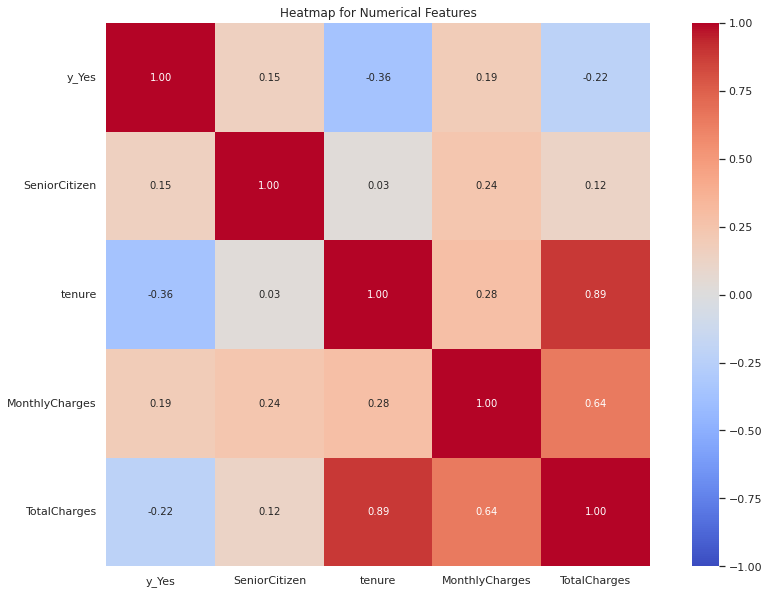

In [50]:
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    pd.concat([
        pd.get_dummies(y_train, prefix='y', drop_first=True),
        X_train.select_dtypes('number')], axis=1
    ).corr('spearman'),
    annot=True, vmin=-1, vmax=1, fmt='.2f', square=True, cmap='coolwarm')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Heatmap for Numerical Features')

plt.show()


- `y_yes` is a dummy variable which represents the target, with a value of `0 being no and 1 being yes`
- There are low spearman correlations amongst features and target, with the highest being `tenure`. This is consistent with our EDA that customers who stopped their subscriptions, tend to do so in their early months
- We can see that `tenure` and `TotalCharges` are highly correlated. This makes sense, since the longer a customer subscribes, the higher the total charges will be
- `MonthlyCharges` and `TotalCharges` are also highly correlated. This makes sense, since `TotalCharges` are cumulative of multiples of `MonthlyCharges`

### Categorizing Selected Features

In [51]:
# display outlier summary
outlier_summary(X_train[num_cols], 1.5).sort_values(by='dist')

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,tenure,0.24,normal,0,0.0
1,MonthlyCharges,-0.22,normal,0,0.0
2,TotalCharges,0.96,skewed,0,0.0


In [52]:
# create list of numerical features with normal distribution
num_cols_norm = ['tenure', 'MonthlyCharges']

# create list of numerical features with skewed distribution
num_cols_skew = ['TotalCharges']

# create final list of nominal features
nom_cols = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

Great! We have finalized our feature list.
We also separated numerical features with different types of distribution just in case we want to scale them using different methods

### List of Features

These are the predictors we're going to use

In [53]:
# print out list of predictors
print('Numerical Features:')
print(num_cols)
print('=' * 50)
print('Categorical Features:')
print(nom_cols)
print('=' * 50)

Numerical Features:
['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features:
['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Feature Engineering

### Prepare The Necessary Objects

Declare the various objects, like scaler and encoder we might use
- All categorical features will use one hot encoder

In [54]:
# declare standard scaler
std_sc = StandardScaler()

# declare min max scaling
mm_sc = MinMaxScaler()

# declare one hot encoder
ohe_enc = OneHotEncoder(handle_unknown='ignore')

# declare label encoder
label_enc = LabelEncoder()

Create ColumnTransformer, SMOTENC, and PCA objects
- In ColumnTransformer, we will design so that our dataset will have the categorical features lined up after the numerical ones

In [55]:
# create column transformer object using min max scaler
scale_mm = ColumnTransformer([
    ('num_norm', std_sc, num_cols_norm),
    ('num_skew', mm_sc, num_cols_skew),
    ('nom', 'passthrough', nom_cols),
])

# create column transformer object for use after oversampling
encode = ColumnTransformer([
    ('num', 'passthrough', slice(0, 3)),
    ('nom', ohe_enc, slice(3, 19)),
])

# create smotenc object
# categorical features will be put at the end, after the numerical ones
smotenc = SMOTENC(
    categorical_features= list(range(3, 19)),
    random_state=42
)

# create pca object
pca = PCA(n_components=0.8, random_state=42)


### Scaling

We need to scale all numerical columns before oversampling

In [56]:
# scale numeric features 
X_train_scaled = scale_mm.fit_transform(X_train)
X_test_scaled = scale_mm.transform(X_test)

# print shape
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (5626, 19)
X_test_scaled shape: (1407, 19)


### Oversampling

Since our data is imbalance, we need to perform oversampling

In [57]:
# oversampling using SMOTE
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_scaled, y_train)

# print shape after oversampling
print('X_train_balanced shape:', X_train_balanced.shape)
print('y_train_balanced shape:', y_train_balanced.shape)

X_train_balanced shape: (8270, 19)
y_train_balanced shape: (8270,)


### Encoding

In [58]:
# encode categorical features
X_train_encoded = encode.fit_transform(X_train_balanced)
X_test_encoded = encode.transform(X_test_scaled)

# encode labels
y_train_final = label_enc.fit_transform(y_train_balanced)
y_test_final = label_enc.transform(y_test)

# print shape
print('X_train_encoded shape:', X_train_encoded.shape)
print('X_test_encoded shape:', X_test_encoded.shape)
print('y_train_final shape:', y_train_final.shape)
print('y_test_final shape:', y_test_final.shape)

X_train_encoded shape: (8270, 46)
X_test_encoded shape: (1407, 46)
y_train_final shape: (8270,)
y_test_final shape: (1407,)


### Dimensionality Reduction

In [59]:
# perform dimensionality reduction
X_train_final = pca.fit_transform(X_train_encoded)
X_test_final = pca.transform(X_test_encoded)

# print shape
print('X_train_final shape:', X_train_final.shape)
print('y_train_final shape:', y_train_final.shape)
print('X_test_final shape:', X_test_final.shape)
print('y_test_final shape:', y_test_final.shape)

X_train_final shape: (8270, 11)
y_train_final shape: (8270,)
X_test_final shape: (1407, 11)
y_test_final shape: (1407,)


We can see that we have reduced the number of features from 46 to 11. The dataset is now about 20% of its original size. Quite a good compression

Let's see how it would look like in 2D

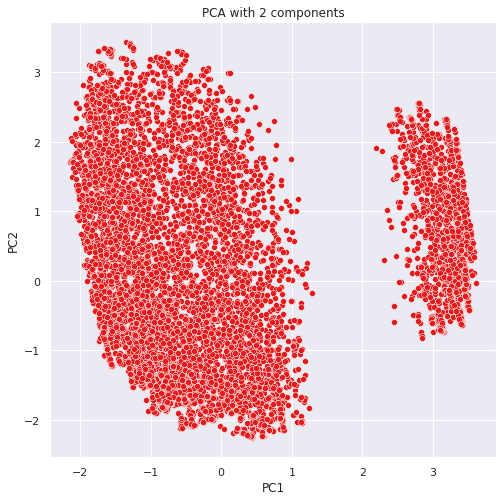

In [60]:
# plot pca with 2 components
pca_2d = PCA(n_components=2, random_state=42)
X_2d  = pca_2d.fit_transform(encode.fit_transform(X_train_balanced))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

Preprocessing is finished

# 6. Model Definition

- Target: Predicting 


- Predictors: The features I'm going to use are

- Models: The Supervised Learning Algorithms I'm going to test

In [61]:
# declare keras model using Sequential API
model_seq = keras.Sequential([
    keras.layers.Dense(
        units=30, activation='relu', input_shape=X_train_final.shape[1:]
    ),
    keras.layers.Dense(units=30, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid'),
])

# compile model
model_seq.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

2022-06-15 01:22:22.488313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [62]:
# declare keras model using functional API
input_ = keras.layers.Input(shape=X_train_final.shape[1:])
hidden_1 = keras.layers.Dense(units=30, activation='relu')(input_)
hidden_2 = keras.layers.Dense(units=30, activation='relu')(hidden_1)
concat = keras.layers.concatenate([input_, hidden_2])
output = keras.layers.Dense(units=1, activation='sigmoid')(concat)
model_func = keras.Model(inputs=input_, outputs=output)

# compile model
model_func.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# 7. Model Training

In [63]:
%%time

# train model with sequential API
history_seq = model_seq.fit(
    X_train_final, y_train_final,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
207/207 [==============================] - 2s 7ms/step - loss: 0.5843 - accuracy: 0.6604 - val_loss: 0.8236 - val_accuracy: 0.4933
Epoch 2/30
207/207 [==============================] - 1s 4ms/step - loss: 0.5190 - accuracy: 0.7492 - val_loss: 0.7081 - val_accuracy: 0.7152
Epoch 3/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.7675 - val_loss: 0.6435 - val_accuracy: 0.7642
Epoch 4/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4773 - accuracy: 0.7740 - val_loss: 0.6134 - val_accuracy: 0.7721
Epoch 5/30
207/207 [==============================] - 1s 5ms/step - loss: 0.4691 - accuracy: 0.7786 - val_loss: 0.5860 - val_accuracy: 0.7842
Epoch 6/30
207/207 [==============================] - 1s 5ms/step - loss: 0.4642 - accuracy: 0.7808 - val_loss: 0.5778 - val_accuracy: 0.7836
Epoch 7/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4608 - accuracy: 0.7798 - val_loss: 0.5752 - val_accuracy: 0.7775
Epoch 

In [64]:
%%time

# train model with functional API
history_func = model_func.fit(
    X_train_final, y_train_final,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
207/207 [==============================] - 2s 6ms/step - loss: 0.6035 - accuracy: 0.6850 - val_loss: 0.6404 - val_accuracy: 0.6729
Epoch 2/30
207/207 [==============================] - 1s 6ms/step - loss: 0.4925 - accuracy: 0.7707 - val_loss: 0.6209 - val_accuracy: 0.7140
Epoch 3/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4736 - accuracy: 0.7746 - val_loss: 0.6016 - val_accuracy: 0.7291
Epoch 4/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4657 - accuracy: 0.7760 - val_loss: 0.5868 - val_accuracy: 0.7400
Epoch 5/30
207/207 [==============================] - 1s 5ms/step - loss: 0.4612 - accuracy: 0.7766 - val_loss: 0.5735 - val_accuracy: 0.7485
Epoch 6/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4583 - accuracy: 0.7784 - val_loss: 0.5677 - val_accuracy: 0.7503
Epoch 7/30
207/207 [==============================] - 1s 4ms/step - loss: 0.4563 - accuracy: 0.7814 - val_loss: 0.5644 - val_accuracy: 0.7509
Epoch 

## Cross Validating Base Models

Since the dataset is imbalance, we are going to evaluate our models based on **F1 Score**\
It's also important that we reduce the number of *False Negatives*, hence a high **Recall** is also important

In [ ]:
# create a dict to store the cross validation scores
cv_results = {
    'models': [],
    'f1_score_mean': [],
    'f1_score_std': [],
    'recall_score_mean': [],
    'recall_score_std': []
} 

# loop over each each models and perform cross validation
for name, model in models.items():
    # fit the model
    model.fit(X_train, y_train)
    # get cross validation scores
    scores = cross_validate(
        model, X_train, y_train,
        scoring=['f1_weighted', 'recall'],
        cv=5
    )

    # store the cross validation scores
    cv_results['models'].append(name)
    cv_results['f1_score_mean'].append(scores['test_f1_weighted'].mean().round(2))
    cv_results['f1_score_std'].append(scores['test_f1_weighted'].std().round(4))
    cv_results['recall_score_mean'].append(scores['test_recall'].mean().round(2))
    cv_results['recall_score_std'].append(scores['test_recall'].std().round(4))

# create a dataframe from the dict
cv_results_df = pd.DataFrame(cv_results)

NameError: name 'models' is not defined

# 8. Model Evaluation

In [ ]:
# evaluate model with sequential API
model_seq.evaluate(X_test_final, y_test_final)

44/44 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7797


[0.4576374888420105, 0.7796730399131775]

In [ ]:
# evaluate model with sequential API
model_func.evaluate(X_test_final, y_test_final)

44/44 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7825


[0.458019495010376, 0.7825160026550293]

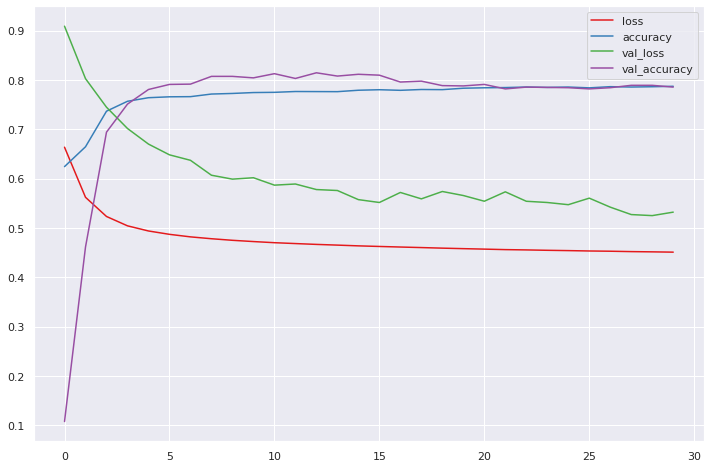

In [ ]:
pd.DataFrame(history_seq.history).plot(figsize=(12, 8))
plt.show()

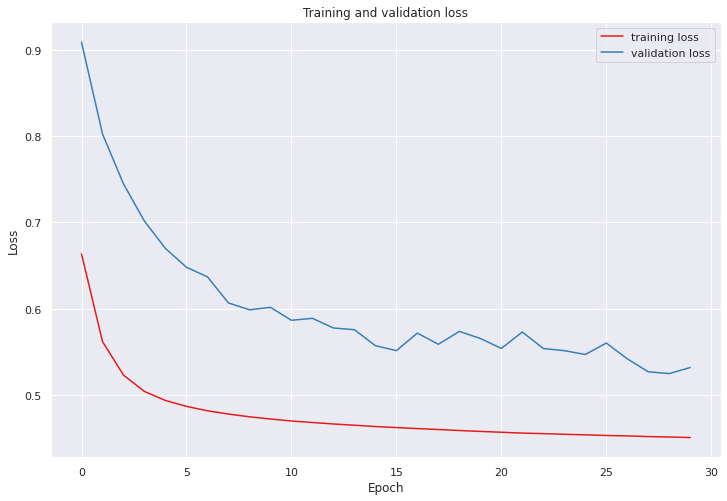

In [ ]:
# plot the training and validation loss for each epoch
plt.figure(figsize=(12, 8))
plt.plot(history_seq.history['loss'], label='training loss')
plt.plot(history_seq.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# display the dataframe sorted by f1 score

## Hyperparameter Tuning


In [ ]:
# create parameter grid

In [ ]:
# create grid search object

In [ ]:
%%time

# perform grid search

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [ ]:
# print the best parameters

# print the best score

In [ ]:
# assign the best estimator to the final model

Running this grid search resulted in:
- pass

## Evaluate Grid Search Results

In [ ]:
# predict train set using the base model

# predict test set using the base model

# predict train set using the final model

# predict test set using the final model

In [ ]:
# prepare target names for classification report

### Base Model Evaluation

In [ ]:
# create classification report for train set

# create classification report for test set

In [ ]:
# plot roc curve for train set
# calculate auc score for train set

# plot roc curve for test set
# calculate auc score for test set

### Final Model Evaluation

In [ ]:
# create classification report for train set

# create classification report for test set

In [ ]:
# plot roc curve for train set
# calculate auc score for train set

# plot roc curve for test set
# calculate auc score for test set

#### Analysis
1. pass

## Save The Final Model

In [ ]:
# prepare directory for saving model
model_dir = 'models'
model_name = ''

# create directory if it does not exist
Path(model_dir).mkdir(parents=True, exist_ok=True)

# save model

# 9. Model Inference

## Load The Model

In [ ]:
# model location
model_dir = 'models'
model_name = ''
model_path = Path(model_dir, model_name)

# load model
final_svm = joblib.load(model_path)

IsADirectoryError: [Errno 21] Is a directory: 'models'

In [ ]:
# display inference set
df_inf.head()

## Inferencing

In [ ]:
%%time

# predict inference set using the final model
y_pred_inf_svm = final_svm.predict(df_inf)

In [ ]:
# create dataframe with predictions
df_inf['pred_svm'] = y_pred_inf_svm

# display inference set
df_inf

Model successfully run on inference dataset

# 10. Conclusion

## On EDA
- pass

## On Modeling
- pass

## Implication
- pass

## Future Improvement
- pass